# Author: Madhuritu Sinha Roy

Task 7: Stock Market Prediction using Numerical and Textual Analysis

GRIP @ The Sparks Foundation

A hybrid model is created for predicting the stock price using numerical analysis ph historical stock prices and sentimental analysis of news headlines

Textual data - https://bit.ly/36fFPI6

Historical stock prices data can be taken from https://finance.yahoo.com/ or any other source

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
stock_df = pd.read_csv('./Stock.csv')
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200
...,...,...,...,...,...,...,...
5119,2020-03-26,70.000000,74.449997,69.650002,73.720001,73.532867,3267500
5120,2020-03-27,71.550003,73.209999,70.279999,70.910004,70.730003,1829800
5121,2020-03-30,71.059998,73.180000,71.059998,72.669998,72.669998,1486200
5122,2020-03-31,72.339996,72.800003,70.500000,71.620003,71.620003,1822100


## EDA On stock_df

In [64]:
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [65]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5.124000e+03
mean,34.090255,34.560553,33.629467,34.106245,31.778674,3.693250e+06
std,18.608831,18.834528,18.381718,18.611595,18.730529,2.481855e+06
min,7.653791,7.961373,7.510730,7.761087,6.674886,2.719000e+05
25%,21.101574,21.452074,20.785050,21.130186,18.790381,2.206475e+06
50%,27.328326,27.703863,27.010015,27.396280,24.714866,3.174050e+06
75%,41.500000,41.860001,41.130001,41.525204,39.203083,4.508075e+06
max,111.587982,115.879829,103.719597,113.733902,97.816307,6.254630e+07


In [66]:
stock_df=stock_df.drop_duplicates()

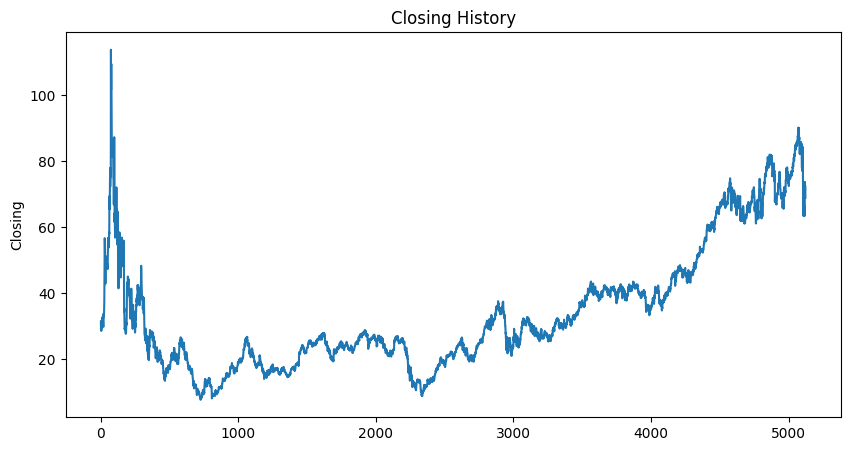

In [67]:
plt.figure(figsize=(10,5))
stock_df["Close"].plot()
plt.title("Closing History")
plt.ylabel("Closing");

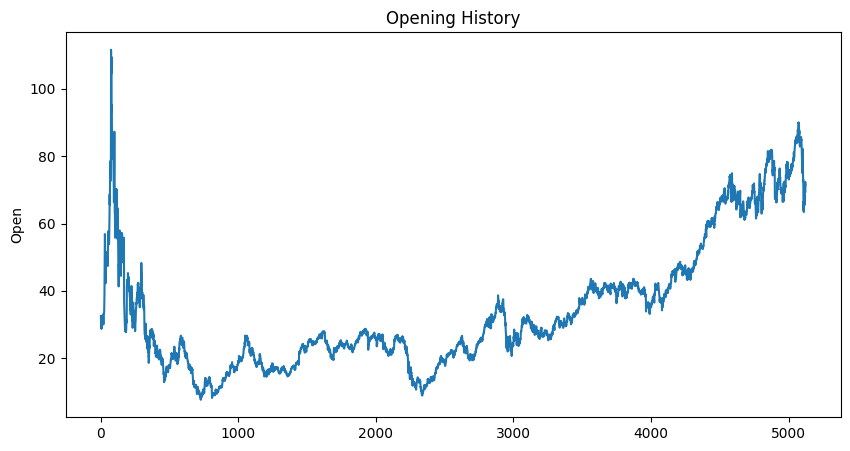

In [68]:
plt.figure(figsize=(10,5))
stock_df["Open"].plot()
plt.ylabel("Open")
plt.title("Opening History");

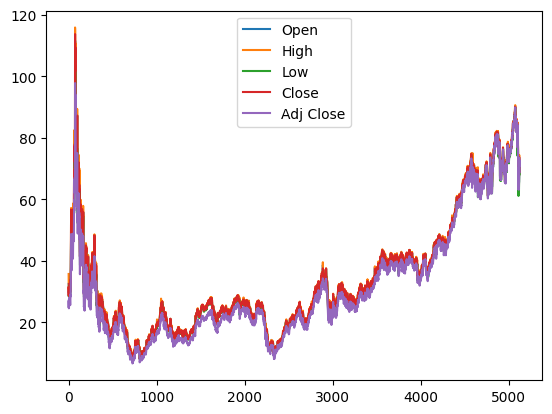

In [69]:
df=stock_df[["Open", "High", "Low", "Close", "Adj Close"]]
df.plot();

Looking at the above graph, we can conclude that the time series is not stationary

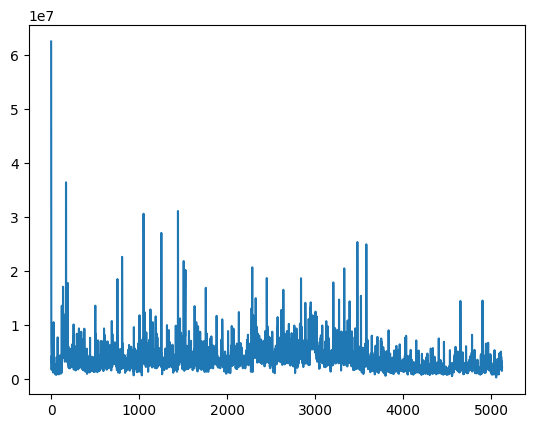

In [70]:
stock_df["Volume"].plot();

In [71]:
## Moving Averages

stock_df["Rolling Mean average"] = stock_df["Close"].rolling(window=10).mean()
stock_df["Rolling Standard deviation"] = stock_df["Close"].rolling(window=10).std()
stock_df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling Mean average,Rolling Standard deviation
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300,NaN,NaN
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100,NaN,NaN
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800,NaN,NaN
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600,NaN,NaN
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200,NaN,NaN
5,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.338428,1729400,NaN,NaN
6,1999-11-29,29.327610,30.355865,29.014664,30.132332,25.915169,4074700,NaN,NaN
7,1999-11-30,30.042919,30.713520,29.282904,30.177038,25.953619,4310000,NaN,NaN
8,1999-12-01,30.177038,31.071173,29.953505,30.713520,26.415012,2957300,NaN,NaN
9,1999-12-02,31.294706,32.188843,30.892345,31.562946,27.145563,3069800,30.185980,1.098488


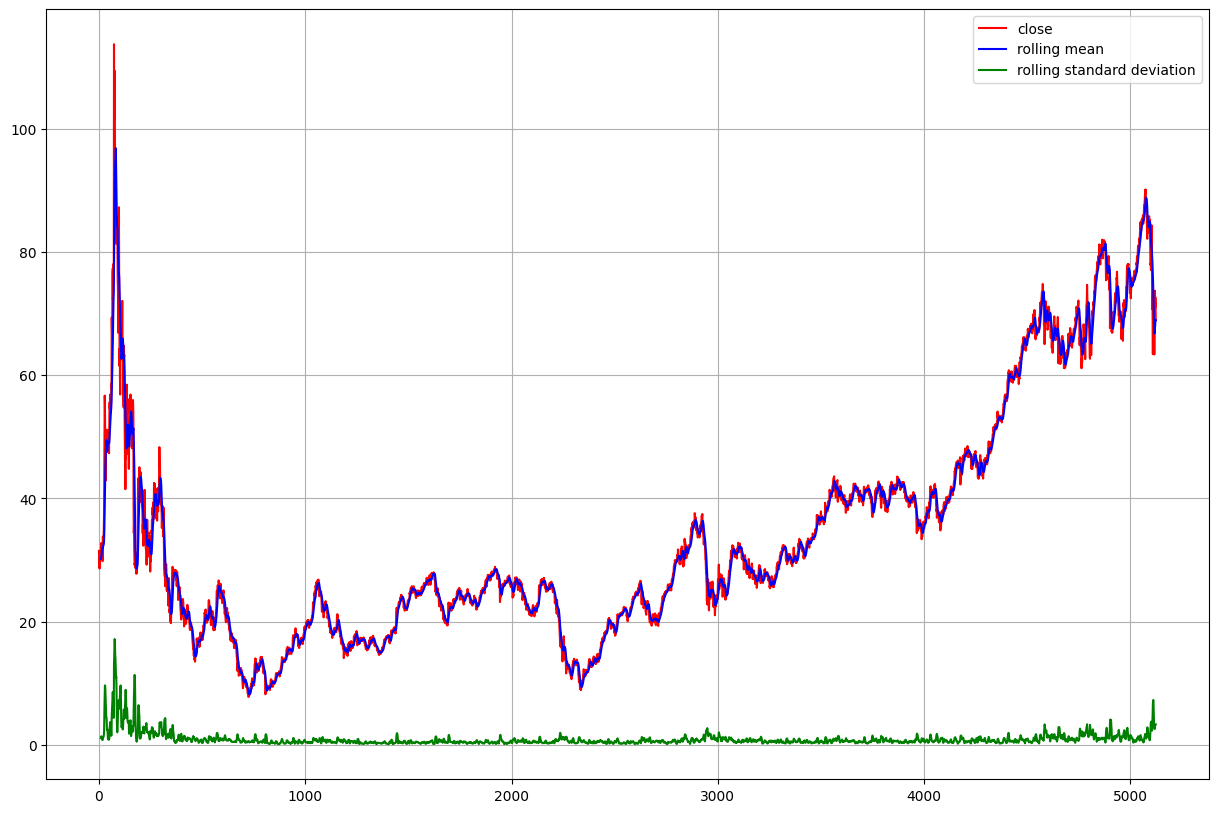

In [72]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(stock_df['Close'],c='r', label='close')
plt.plot(stock_df['Rolling Mean average'],c='b', label='rolling mean')
plt.plot(stock_df['Rolling Standard deviation'],c='g', label='rolling standard deviation')
plt.legend();

In [73]:
## Calculating the cummulative moving average - it takes the preceding values also into account
stock_df['Cummulative mean'] = stock_df["Close"].expanding(min_periods=10).mean()
stock_df["Cummulative std"] = stock_df["Close"].expanding(min_periods=10).std()
stock_df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling Mean average,Rolling Standard deviation,Cummulative mean,Cummulative std
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300,NaN,NaN,NaN,NaN
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100,NaN,NaN,NaN,NaN
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800,NaN,NaN,NaN,NaN
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600,NaN,NaN,NaN,NaN
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200,NaN,NaN,NaN,NaN
5,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.338428,1729400,NaN,NaN,NaN,NaN
6,1999-11-29,29.327610,30.355865,29.014664,30.132332,25.915169,4074700,NaN,NaN,NaN,NaN
7,1999-11-30,30.042919,30.713520,29.282904,30.177038,25.953619,4310000,NaN,NaN,NaN,NaN
8,1999-12-01,30.177038,31.071173,29.953505,30.713520,26.415012,2957300,NaN,NaN,NaN,NaN
9,1999-12-02,31.294706,32.188843,30.892345,31.562946,27.145563,3069800,30.185980,1.098488,30.185980,1.098488


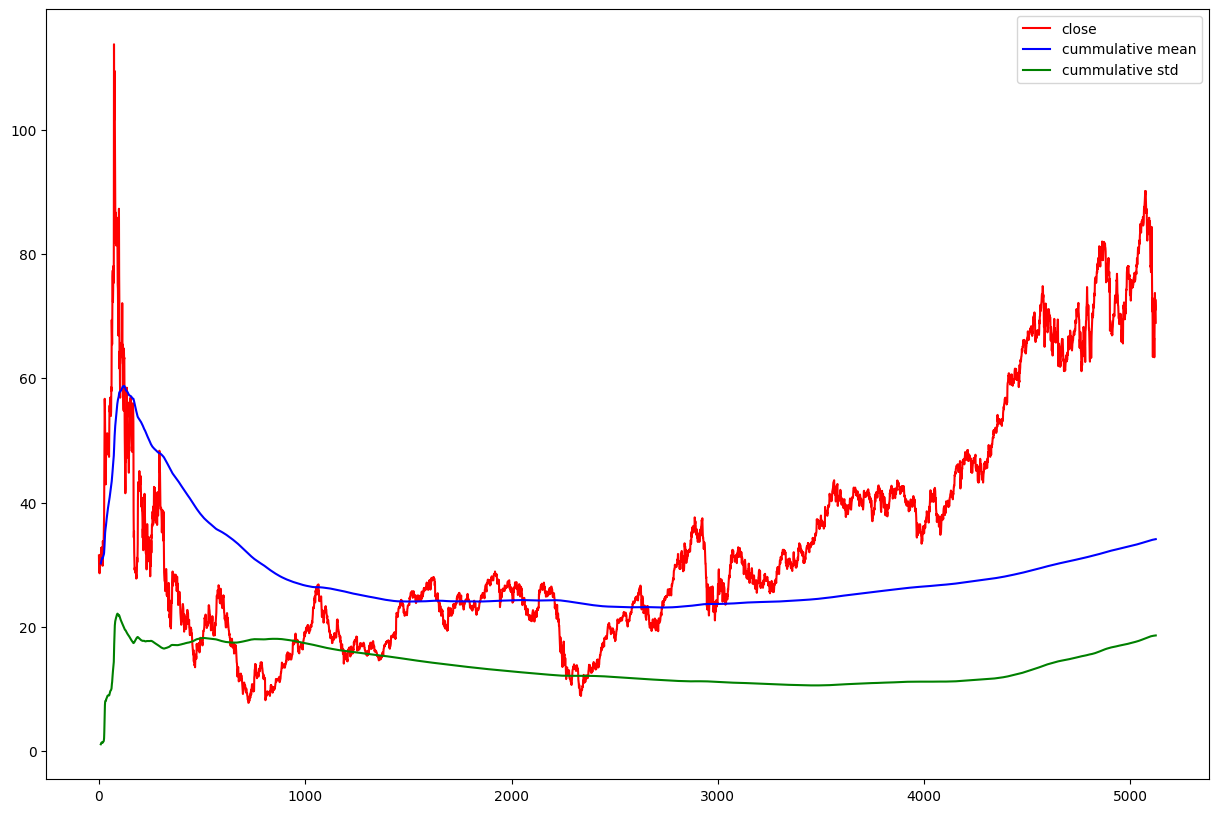

In [74]:
plt.figure(figsize=(15,10))
plt.plot(stock_df['Close'],c='r', label='close')
plt.plot(stock_df['Cummulative mean'],c='b', label='cummulative mean')
plt.plot(stock_df['Cummulative std'],c='g', label='cummulative std')
plt.legend();

In [75]:
#Exponential Moving Average - gives more weight to the recent one
stock_df['Exponential mean'] = stock_df["Close"].ewm(span=10,adjust=False).mean()
stock_df['Exponential std'] = stock_df["Close"].ewm(span=10,adjust=False).std()
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling Mean average,Rolling Standard deviation,Cummulative mean,Cummulative std,Exponential mean,Exponential std
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300,NaN,NaN,NaN,NaN,31.473534,NaN
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100,NaN,NaN,NaN,NaN,31.002081,1.833521
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800,NaN,NaN,NaN,NaN,31.087799,1.309269
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600,NaN,NaN,NaN,NaN,30.637709,1.597713
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200,NaN,NaN,NaN,NaN,30.407638,1.469886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,2020-03-26,70.000000,74.449997,69.650002,73.720001,73.532867,3267500,67.795000,3.095726,34.077398,18.590172,69.170407,4.668683
5120,2020-03-27,71.550003,73.209999,70.279999,70.910004,70.730003,1829800,67.966001,3.226428,34.084590,18.595481,69.486697,4.281796
5121,2020-03-30,71.059998,73.180000,71.059998,72.669998,72.669998,1486200,68.820001,3.228485,34.092124,18.601480,70.065479,4.083541
5122,2020-03-31,72.339996,72.800003,70.500000,71.620003,71.620003,1822100,68.938001,3.314688,34.099449,18.607053,70.348120,3.747381


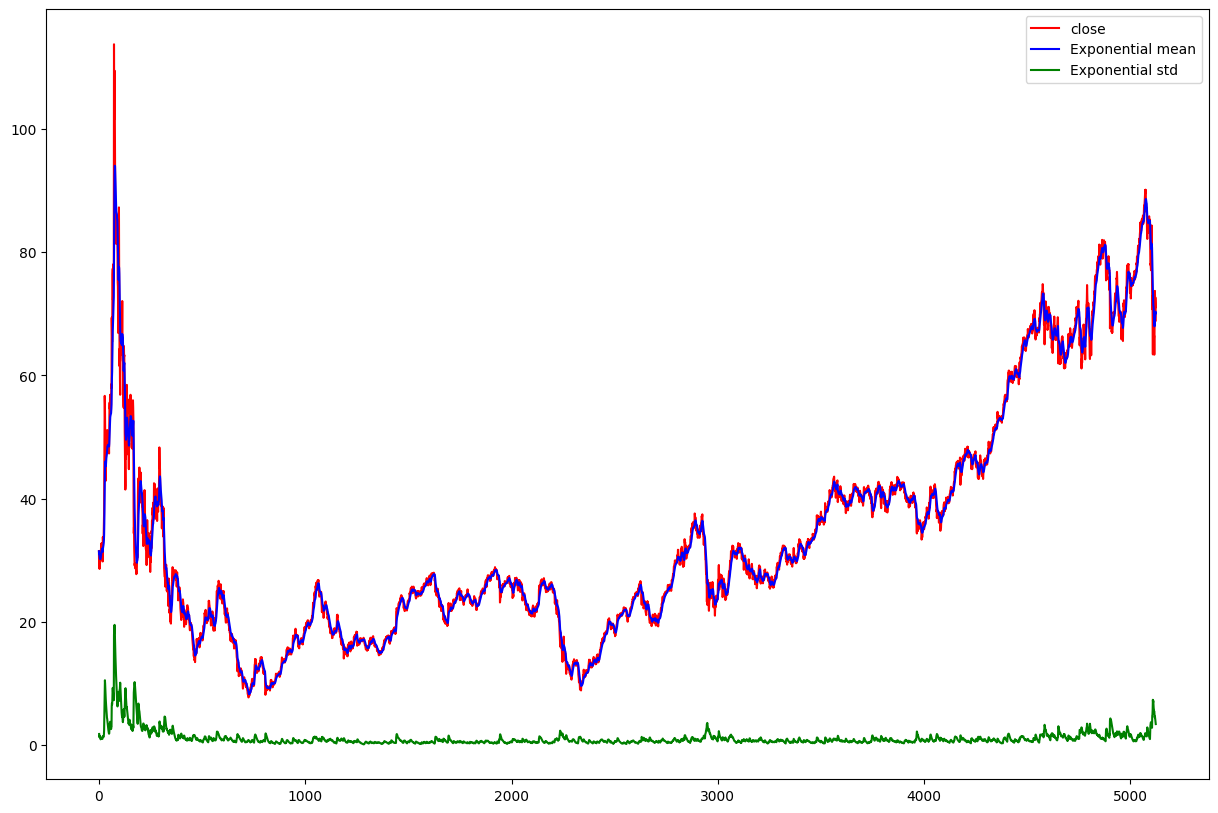

In [76]:
plt.figure(figsize=(15,10))
plt.plot(stock_df['Close'],c='r', label='close')
plt.plot(stock_df['Exponential mean'],c='b', label='Exponential mean')
plt.plot(stock_df['Exponential std'],c='g', label='Exponential std')
plt.legend();

As we can see the graph isn't stationary.
Stationary time series should have:

    * Constant mean
    
    * Constant variance
    
    * Constant covariance
    
    * Constant autocorrelation structure over time
    
    * No periodic fluctuation
    
Transformations to achieve staitionarity:

    * Differencing the data
    
    * If the data has trend then fitting a curve to it
    
    * If there's non constant variation - take the log or the sqrt of the series of the series
    
    * Negative data - add suitable constant to make the data positive

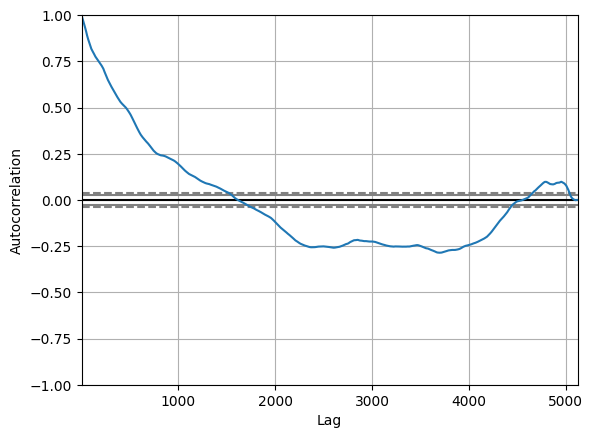

In [77]:
# Autocorrelation plot 
# Autocorrelation - degree of similarity between a given time series and a lagged version of itself over succesive time intervals
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stock_df['Close']);

### Augmented dickey full test

Done to check if the series is stationary or not

In [78]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(df["Close"])

(-0.9919240571571462,
 0.7561984073053731,
 33,
 5090,
 {'1%': -3.431635383281896,
  '5%': -2.862108002627225,
  '10%': -2.5670723481073487},
 15365.583686236978)

The ADF statistic is -0.53 and p value is 0.88.

ADF statistic - negative value indicates a tendency for the time series to be stationary (no trend or seasonality). The more negative the value, the stronger the evidence against a unit root (non-stationary), but in our case its close to 0 and not that negative.

p-value - represents the statistical significance of the ADF statistic. A low p-value (typically less than 0.05) suggests that we can reject the null hypothesis of a unit root and conclude that the time series is likely stationary, in our case it is 0.88, high probability (88%) of observing this statistic even if the data has a unit root. This means we fail to reject the null hypothesis.

C:\Users\madhu\AppData\Local\Temp\ipykernel_25572\2635072176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["closediff"][0] = 0


(-14.448813904569635,
 7.155014834791116e-27,
 32,
 5091,
 {'1%': -3.4316351306729262,
  '5%': -2.8621078910250595,
  '10%': -2.5670722886973096},
 15364.574315622749)

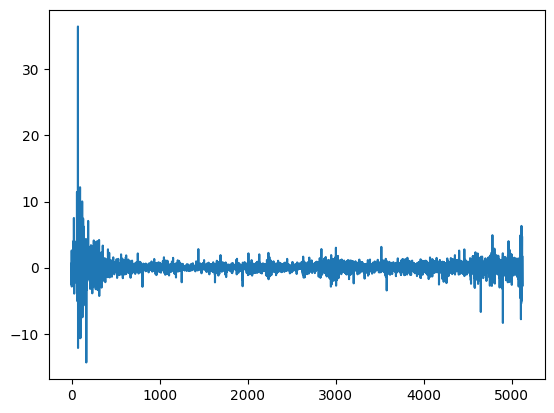

In [79]:
# Differencing
stock_df["closediff"] = stock_df["Close"].diff()
stock_df["closediff"][0] = 0
plt.plot(stock_df["closediff"])
# ADF
sm.tsa.stattools.adfuller(stock_df["closediff"])

ADF test statistic = -14.44

p-value =  7.155014834791116e-27

It has become stationary

### ACF and PACF


ACF - to show the direct as well as indirect relations between a value with a lagged version of itself

PACF - only shows the direct relationship between a value and a lagged version of itself

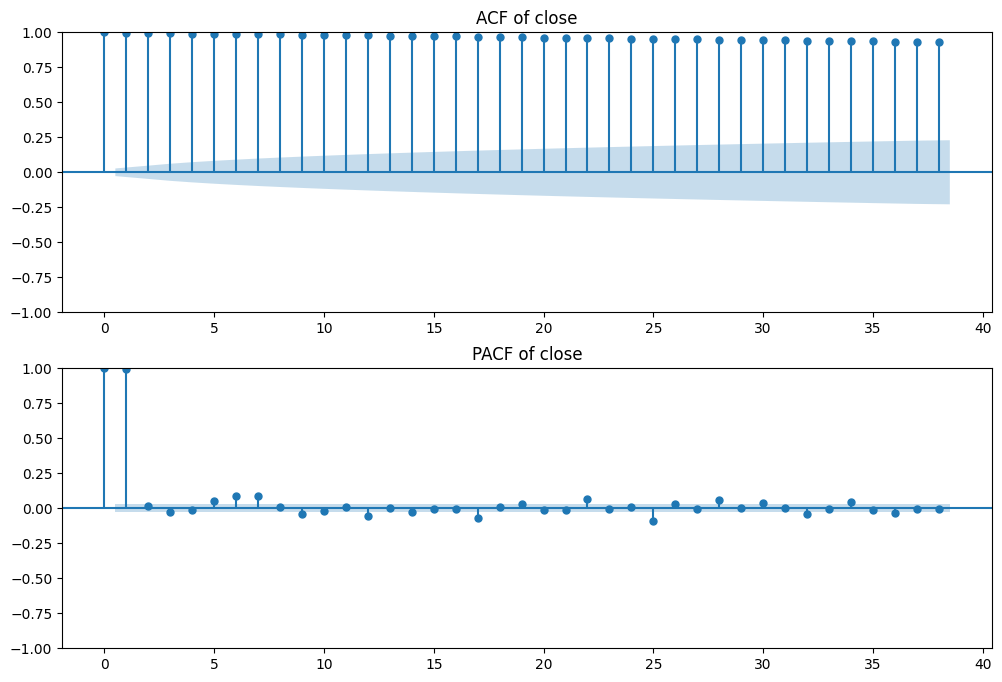

In [80]:
from scipy import stats
#from statsmodels.tsa.arima.model import ARIMA
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_df['Close'], ax=ax1)
plt.title("ACF of close")
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_df['Close'], ax=ax2)
plt.title("PACF of close")
plt.show()

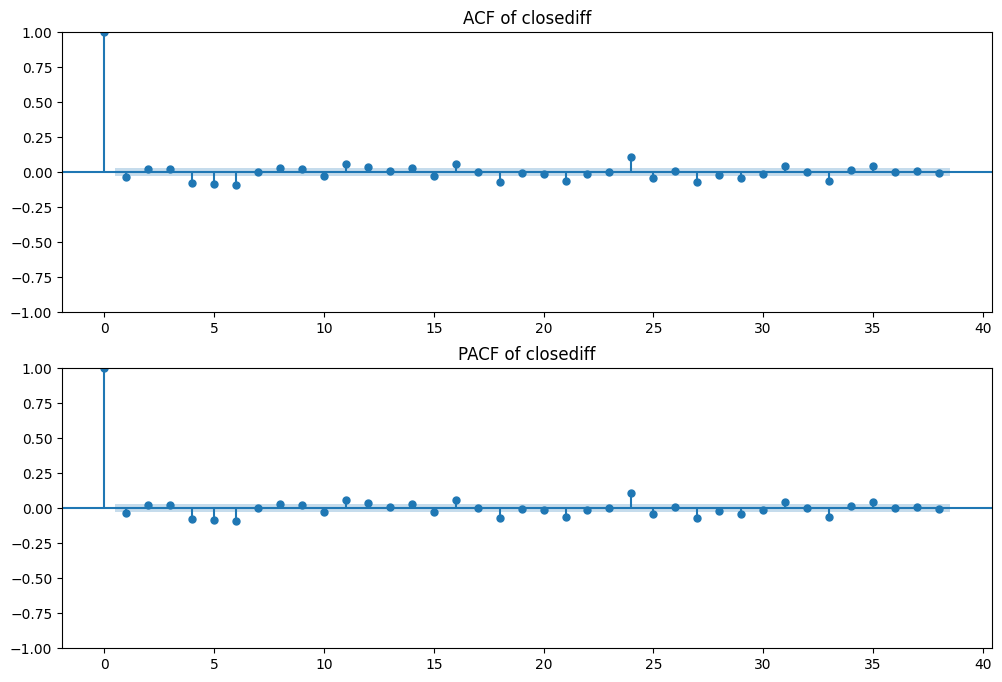

In [81]:
fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(stock_df['closediff'], ax=ax3)
plt.title("ACF of closediff")
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_df['closediff'], ax=ax4)
plt.title("PACF of closediff")
plt.show()

In [84]:
# train test split
train_df = stock_df[:4099]
test_df = stock_df[4099:]

In [85]:
train_df.shape, test_df.shape

((4099, 14), (1025, 14))

In [86]:
x = train_df["closediff"]

In [87]:
import pmdarima as pm
model = pm.auto_arima(x, trace = True, error_action = 'ignore', suppress_warnings = True)
print(model.summary)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12775.045, Time=4.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12820.322, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12821.740, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12821.750, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12818.334, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12814.507, Time=3.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12825.304, Time=1.52 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=12777.642, Time=5.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=12707.727, Time=5.95 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=12808.853, Time=2.59 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=12709.555, Time=7.94 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=12726.768, Time=3.51 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=12760.968, Time=3.43 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=12727.423, Time=6.50 sec
 ARIMA(2,0,3)(0,0,0

In [88]:
model.fit(x)

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [89]:
# Predictions
predictions = model.predict(n_periods = len(test_df))
predictions = pd.DataFrame(predictions,index = test_df.index,columns=['Prediction'])
predictions.head()

,Prediction
4099,-0.088412
4100,-0.134555
4101,-0.148553
4102,-0.120894
4103,-0.061016


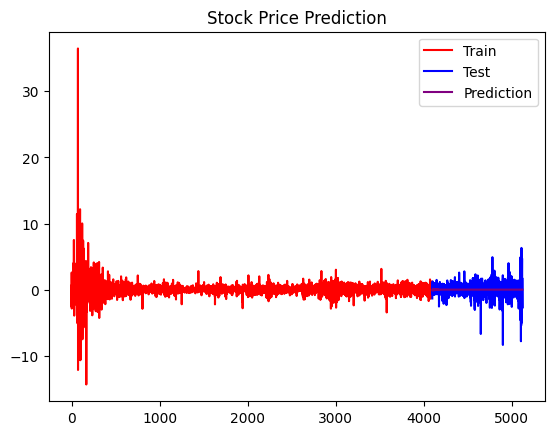

In [90]:
plt.plot(x, c = 'r', label='Train')
plt.plot(test_df["closediff"], c='b', label='Test')
plt.plot(predictions, c='purple', label='Prediction')
plt.title('Stock Price Prediction')
plt.legend();

In [91]:
#Calculating error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_df["closediff"],predictions))
print("RMSE : ", rms)

RMSE :  1.1014221994751172


## EDA on textual data

In [29]:
textual_df = pd.read_csv('./india-news-headlines.csv')
textual_df

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [30]:
textual_df = textual_df.drop("headline_category", axis=1)

In [31]:
textual_df = textual_df.drop_duplicates()
textual_df

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
...,...,...
3650960,20220331,Garment industry jittery over'GST hike'
3650961,20220331,AAP MLAs interfering in work: Councillors
3650962,20220331,Schools organise vax camps for kids
3650965,20220331,J&K sacks 2 cops; 3 other employees over terro...


In [33]:
from datetime import datetime
textual_df["publish_date"] = pd.to_datetime(textual_df["publish_date"], format = '%Y%m%d')
textual_df

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3650960,2022-03-31,Garment industry jittery over'GST hike'
3650961,2022-03-31,AAP MLAs interfering in work: Councillors
3650962,2022-03-31,Schools organise vax camps for kids
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...


In [34]:
textual_df.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [35]:
textual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3488872 entries, 0 to 3650966
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   publish_date   datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 79.9+ MB


### Subjectivity and Polarity
* Subjectivity: degree to which a piece of text expresses personal opinions, feelings, or beliefs.
* Polarity : Polarity refers to the overall sentiment or opinion expressed in a piece of text.

In [38]:
from textblob import TextBlob
textual_df["Subjectivity"] = textual_df["headline_text"].apply(lambda text: TextBlob(text).sentiment.subjectivity)
textual_df["Polarity"] = textual_df["headline_text"].apply(lambda text: TextBlob(text).sentiment.polarity)
textual_df

,publish_date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050
...,...,...,...,...
3650960,2022-03-31,Garment industry jittery over'GST hike',0.000000,0.000
3650961,2022-03-31,AAP MLAs interfering in work: Councillors,0.000000,0.000
3650962,2022-03-31,Schools organise vax camps for kids,0.000000,0.000
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...,0.375000,-0.125


In [40]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...


True

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [48]:

def get_sentiment_score(text, key):
  """
  Extracts a specific sentiment score from Vader's output,
  handling potential missing keys.

  Args:
      text (str): The text to analyze.
      key (str): The key for the desired sentiment score (e.g., "neg", "neu", "pos").

  Returns:
      float: The sentiment score or None if the key is missing.
  """
  scores = analyzer.polarity_scores(text)
  return scores.get(key, None)

# Apply sentiment analysis with error handling
sentiment_scores = textual_df['headline_text'].apply(get_sentiment_score, args=('neg',))
textual_df['Negative'] = sentiment_scores

sentiment_scores = textual_df['headline_text'].apply(get_sentiment_score, args=('neu',))
textual_df['Neutral'] = sentiment_scores

sentiment_scores = textual_df['headline_text'].apply(get_sentiment_score, args=('pos',))
textual_df['Positive'] = sentiment_scores
textual_df

,publish_date,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.000,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3650960,2022-03-31,Garment industry jittery over'GST hike',0.000000,0.000,0.000,1.000,0.000
3650961,2022-03-31,AAP MLAs interfering in work: Councillors,0.000000,0.000,0.000,1.000,0.000
3650962,2022-03-31,Schools organise vax camps for kids,0.000000,0.000,0.000,1.000,0.000
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...,0.375000,-0.125,0.327,0.673,0.000


## Merge the stock price data and the sentiment data

In [50]:
textual_df = textual_df.rename(columns={"publish_date": "Date"})
textual_df

,Date,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.000,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3650960,2022-03-31,Garment industry jittery over'GST hike',0.000000,0.000,0.000,1.000,0.000
3650961,2022-03-31,AAP MLAs interfering in work: Councillors,0.000000,0.000,0.000,1.000,0.000
3650962,2022-03-31,Schools organise vax camps for kids,0.000000,0.000,0.000,1.000,0.000
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...,0.375000,-0.125,0.327,0.673,0.000


In [92]:
textual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3488872 entries, 0 to 3650966
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   headline_text  object        
 2   Subjectivity   float64       
 3   Polarity       float64       
 4   Negative       float64       
 5   Neutral        float64       
 6   Positive       float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 341.9+ MB


In [93]:
stock_df["Date"] = pd.to_datetime(stock_df["Date"], format = '%Y-%m-%d')
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5124 entries, 0 to 5123
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        5124 non-null   datetime64[ns]
 1   Open                        5124 non-null   float64       
 2   High                        5124 non-null   float64       
 3   Low                         5124 non-null   float64       
 4   Close                       5124 non-null   float64       
 5   Adj Close                   5124 non-null   float64       
 6   Volume                      5124 non-null   int64         
 7   Rolling Mean average        5115 non-null   float64       
 8   Rolling Standard deviation  5115 non-null   float64       
 9   Cummulative mean            5115 non-null   float64       
 10  Cummulative std             5115 non-null   float64       
 11  Exponential mean            5124 non-null   float64     

In [96]:
df_2 = pd.merge(stock_df, textual_df, how='inner', on='Date')
df_2

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling Mean average,Rolling Standard deviation,Cummulative mean,Cummulative std,Exponential mean,Exponential std,closediff,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,38.537197,38.537197,35.094780,36.391273,31.298149,2261600,38.841201,1.566196,48.207948,17.143404,38.755995,1.804021,-2.771816,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.000,0.805,0.195
1,2001-01-02,38.537197,38.537197,35.094780,36.391273,31.298149,2261600,38.841201,1.566196,48.207948,17.143404,38.755995,1.804021,-2.771816,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.000,1.000,0.000
2,2001-01-02,38.537197,38.537197,35.094780,36.391273,31.298149,2261600,38.841201,1.566196,48.207948,17.143404,38.755995,1.804021,-2.771816,America's unwanted heading for India?,0.000000,0.00,0.322,0.678,0.000
3,2001-01-02,38.537197,38.537197,35.094780,36.391273,31.298149,2261600,38.841201,1.566196,48.207948,17.143404,38.755995,1.804021,-2.771816,For bigwigs; it is destination Goa,0.000000,0.00,0.000,1.000,0.000
4,2001-01-02,38.537197,38.537197,35.094780,36.391273,31.298149,2261600,38.841201,1.566196,48.207948,17.143404,38.755995,1.804021,-2.771816,Extra buses to clear tourist traffic,0.241667,0.05,0.000,0.658,0.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186677,2020-04-01,69.470001,70.230003,68.150002,68.919998,68.919998,2173600,68.943000,3.314611,34.106245,18.611595,70.088461,3.439001,-2.700005,How many times can we revise the text?,0.500000,0.50,0.000,1.000,0.000
2186678,2020-04-01,69.470001,70.230003,68.150002,68.919998,68.919998,2173600,68.943000,3.314611,34.106245,18.611595,70.088461,3.439001,-2.700005,Sex workers run out of food; essentials,0.000000,0.00,0.000,1.000,0.000
2186679,2020-04-01,69.470001,70.230003,68.150002,68.919998,68.919998,2173600,68.943000,3.314611,34.106245,18.611595,70.088461,3.439001,-2.700005,they cant cook to save their lives,0.000000,0.00,0.305,0.695,0.000
2186680,2020-04-01,69.470001,70.230003,68.150002,68.919998,68.919998,2173600,68.943000,3.314611,34.106245,18.611595,70.088461,3.439001,-2.700005,...While they cook to make a living,0.000000,0.00,0.000,1.000,0.000


In [97]:
df_1 = df_2[["Close", "closediff", "Subjectivity", "Polarity", "Negative", "Neutral", "Positive"]]
df_1

,Close,closediff,Subjectivity,Polarity,Negative,Neutral,Positive
0,36.391273,-2.771816,0.000000,0.00,0.000,0.805,0.195
1,36.391273,-2.771816,0.000000,0.00,0.000,1.000,0.000
2,36.391273,-2.771816,0.000000,0.00,0.322,0.678,0.000
3,36.391273,-2.771816,0.000000,0.00,0.000,1.000,0.000
4,36.391273,-2.771816,0.241667,0.05,0.000,0.658,0.342
...,...,...,...,...,...,...,...
2186677,68.919998,-2.700005,0.500000,0.50,0.000,1.000,0.000
2186678,68.919998,-2.700005,0.000000,0.00,0.000,1.000,0.000
2186679,68.919998,-2.700005,0.000000,0.00,0.305,0.695,0.000
2186680,68.919998,-2.700005,0.000000,0.00,0.000,1.000,0.000


### Normalizing data

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df_1))
df.columns = df_1.columns
df

,Close,closediff,Subjectivity,Polarity,Negative,Neutral,Positive
0,0.347585,0.381348,0.000000,0.500,0.000,0.805,0.195
1,0.347585,0.381348,0.000000,0.500,0.000,1.000,0.000
2,0.347585,0.381348,0.000000,0.500,0.322,0.678,0.000
3,0.347585,0.381348,0.000000,0.500,0.000,1.000,0.000
4,0.347585,0.381348,0.241667,0.525,0.000,0.658,0.342
...,...,...,...,...,...,...,...
2186677,0.742500,0.386239,0.500000,0.750,0.000,1.000,0.000
2186678,0.742500,0.386239,0.000000,0.500,0.000,1.000,0.000
2186679,0.742500,0.386239,0.000000,0.500,0.305,0.695,0.000
2186680,0.742500,0.386239,0.000000,0.500,0.000,1.000,0.000


In [101]:
X  = df.drop("Close", axis=1)
y = df["Close"]

In [104]:
from sklearn.model_selection import train_test_split
np.random.seed(32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7499289708664092

In [105]:
prediction = model.predict(X_test)
mse  = mean_squared_error(prediction,y_test)
mse

0.01266519917443246

In [106]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtree = RandomForestRegressor()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.749838796264481

In [107]:
prediction = dtree.predict(X_test)
mse  = mean_squared_error(prediction,y_test)
mse

0.012669766194042255

Two models - RandomForestRegressor and Decision Trees are used. The MSE values and the F1-score are very similar to each other but RandomForestRegressor works a bit better than the Decision Trees.

# Conclusion:

A hybrid model is created for predicting the Stock Prices.